<a href="https://colab.research.google.com/github/TranHaoDong/BT_AI_WEEK9-15/blob/main/Week11/VN_dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [ ]:
#Tạo DATA:
folder = '/content/drive/MyDrive/VN_Dishes/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('PHO'):
    output= 1.0
  if file.startswith('COMTAM'):
    output= 2.0
  if file.startswith('BANHMI'):
    output= 3.0
  if file.startswith('BANHXEO'):
    output= 4.0
  if file.startswith('BANHTET'):
    output= 5.0
  if file.startswith('MIQUANG'):
    output= 6.0
  if file.startswith('BUNBOHUE'):
    output= 7.0
  if file.startswith('HUTIEU'):
    output= 8.0
  if file.startswith('CAKHO'):
    output= 9.0
  if file.startswith('BUNRIEU'):
    output= 10.0
  photo = load_img(folder + file, target_size= (100,100))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/Data/VN_dishes_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/Data/VN_dishes_labels.npy', labels)

(7124, 100, 100, 3) (7124,)


In [ ]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:
print(test_x.shape, train_x.shape)

(356, 100, 100, 3) (6768, 100, 100, 3)


In [ ]:
train_x = train_x.reshape((6768, 100, 100, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((356, 100, 100, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,11)
test_y = to_categorical(test_y,11)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 128
epochs = 40
classes = 11

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (100, 100, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(512, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [ ]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/40
53/53 [==============================] - 335s 6s/step - loss: 2.2749 - accuracy: 0.1783
Epoch 2/40
53/53 [==============================] - 321s 6s/step - loss: 1.9028 - accuracy: 0.3254
Epoch 3/40
53/53 [==============================] - 326s 6s/step - loss: 1.6421 - accuracy: 0.4220
Epoch 4/40
53/53 [==============================] - 320s 6s/step - loss: 1.4173 - accuracy: 0.5222
Epoch 5/40
53/53 [==============================] - 325s 6s/step - loss: 1.2358 - accuracy: 0.5746
Epoch 6/40
53/53 [==============================] - 322s 6s/step - loss: 1.0562 - accuracy: 0.6384
Epoch 7/40
53/53 [==============================] - 323s 6s/step - loss: 0.9020 - accuracy: 0.6866
Epoch 8/40
53/53 [==============================] - 321s 6s/step - loss: 0.7589 - accuracy: 0.7472
Epoch 9/40
53/53 [==============================] - 321s 6s/step - loss: 0.5523 - accuracy: 0.8132
Epoch 10/40
53/53 [==============================] - 323s 6s/step - loss: 0.4003 - accuracy: 0.8629
Epoch 11/

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 30ms/step
BANHMI


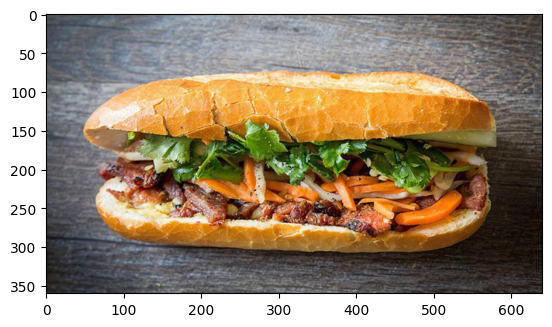

1/1 [==============================] - 0s 31ms/step
HUTIEU


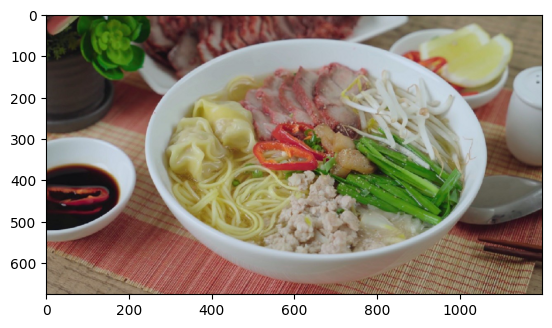

1/1 [==============================] - 0s 29ms/step
COMTAM


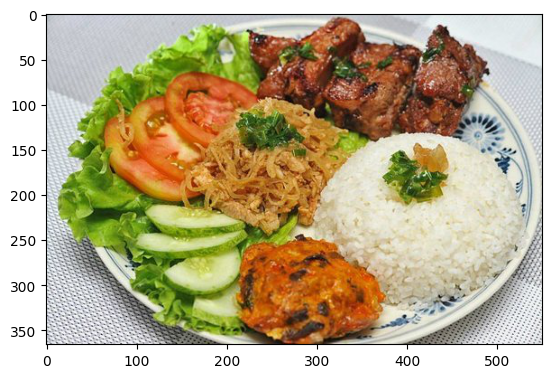

1/1 [==============================] - 0s 29ms/step
BUNBOHUE


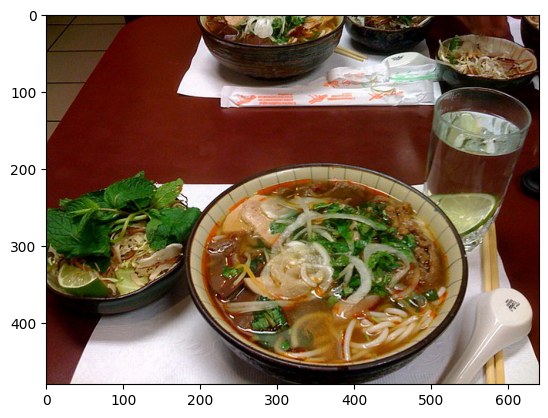

1/1 [==============================] - 0s 38ms/step
BANHXEO


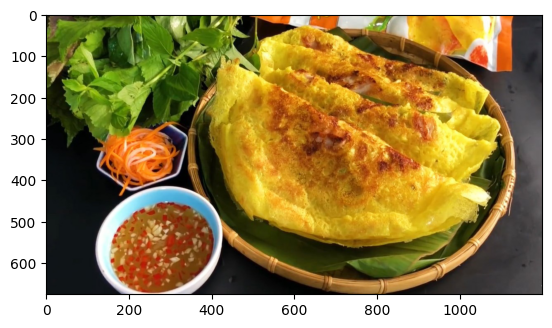

1/1 [==============================] - 0s 34ms/step
BUNRIEU


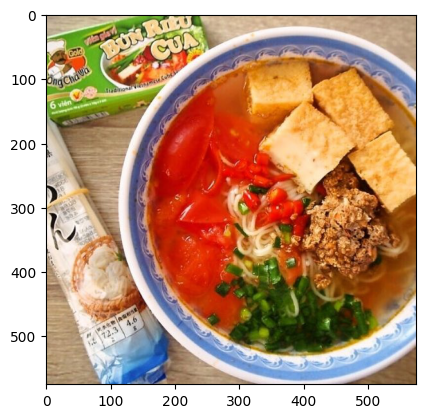

1/1 [==============================] - 0s 30ms/step
BANHTET


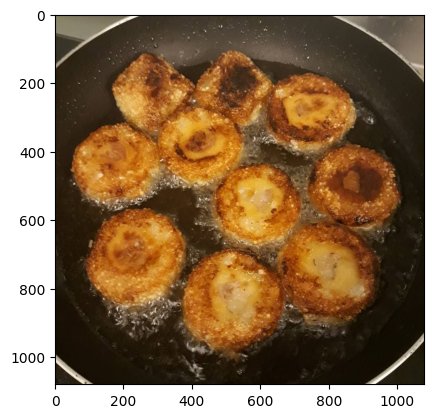

1/1 [==============================] - 0s 33ms/step
CAKHO


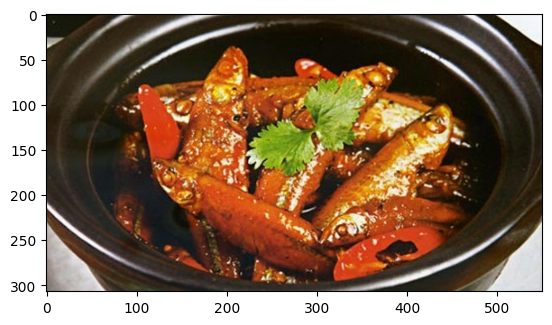

1/1 [==============================] - 0s 30ms/step
PHO


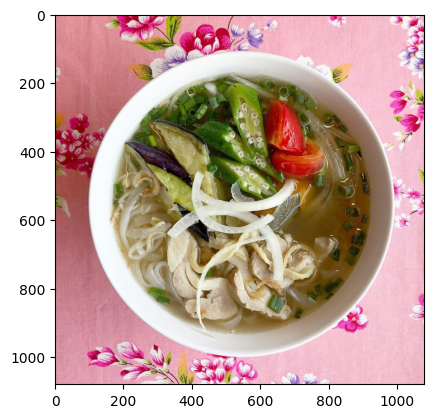

1/1 [==============================] - 0s 38ms/step
MIQUANG


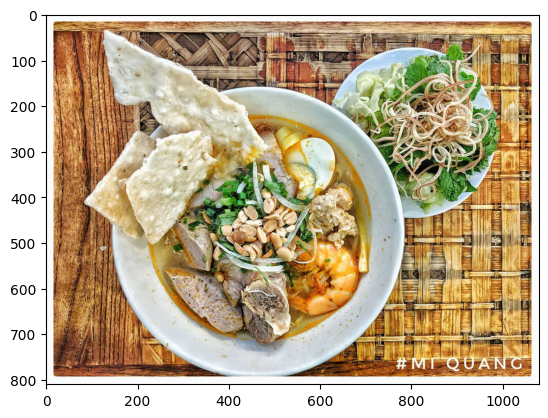

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/Test_dishes/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','PHO', 'COMTAM', 'BANHMI', 'BANHXEO', 'BANHTET',
                  'MIQUANG', 'BUNBOHUE', 'HUTIEU', 'CAKHO', 'BUNRIEU']
  print(class_name[result])
  plt.show()